# Сборный проект

## Общая информация

Откроем файлы с данными и изучим общую информацию

In [1]:
import pandas as pd
games = pd.read_csv('/datasets/games.csv')
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Как мы видим, есть столбцы, которые подлежат обработке, например, столбец с годом, его необходимо привести в целочисленный вид. Также присутствуют пропуски в некоторых столбцах, подумаем, что лучше с ними сделать. 

In [2]:
rating = pd.read_csv('/datasets/rating.csv')
rating

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


В данной столбце нет каких-то проблем с данными. 

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         10015 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как мы видим, столбец user_score имеет формат object, что говорит о том, что имеются какие-то пропуски или ошибочные значения. Возможно, это связано с тем, что игры достаточно старые и ранее рейтинговая система не применялась.

In [4]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


## Предобработка данных

In [5]:
print(games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_players',
       'EU_players', 'RU_players', 'Other_players', 'Critic_Score',
       'User_Score', 'Rating'],
      dtype='object')


In [6]:
#приведем названия столбцов в единый формат, переименовав их
games.columns = ['name', 'platform', 'year_of_release', 'genre',
       'na_players', 'eu_players', 'ru_players', 'other_players',
       'critic_score', 'user_score', 'rating']
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_players',
       'eu_players', 'ru_players', 'other_players', 'critic_score',
       'user_score', 'rating'],
      dtype='object')


In [7]:
print(rating.columns)

Index(['rating_type', 'decryption'], dtype='object')


In [8]:
#переименуем столбец
rating.columns = ['rating', 'decryption']
print(rating.columns)

Index(['rating', 'decryption'], dtype='object')


In [9]:
#склеим наши таблицы по столбику rating
games_total = games.merge(rating, left_on=['rating'],right_on=['rating'], how='left').reset_index()
games_total.reset_index()

,level_0,index,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption
0,0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Для всех
1,1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех
3,3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Для всех
4,4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
5,5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN
6,6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Для всех
7,7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Для всех
8,8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,Для всех
9,9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NaN


In [32]:
#оставим только нужные нам колонки
total = games_total.loc[:,['name','platform', 'year_of_release', 'genre', 'na_players', 'eu_players', 'ru_players',
                                                        'other_players', 'critic_score', 'user_score', 'rating', 'decryption']]
total.head(10)

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Для всех
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Для всех
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Для всех
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,Для всех
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NaN


In [33]:
#посчитаем количество продаж во всех регионах и запишем в отдельный столбец
total['total_players'] = total['na_players'] + total['eu_players'] + total['ru_players'] + total['other_players']
total.head(10)

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption,total_players
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Для всех,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Для всех,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Для всех,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,Для всех,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NaN,28.31


In [34]:
#посчитаем количество пропущенных значений в общей таблице 
total.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_players            0
eu_players            0
ru_players            0
other_players         0
critic_score       8582
user_score         6704
rating             6769
decryption         6769
total_players         0
dtype: int64

In [35]:
#рассмотрим столбец name подробнее, там пропущено 2 значения
total.loc[total['name'].isna() == True, 'name']

659      NaN
14246    NaN
Name: name, dtype: object

In [36]:
#посмотрим строчку 659
total.loc[659]

name                NaN
platform            GEN
year_of_release    1993
genre               NaN
na_players         1.78
eu_players         0.53
ru_players            0
other_players      0.08
critic_score        NaN
user_score          NaN
rating              NaN
decryption          NaN
total_players      2.39
Name: 659, dtype: object

In [37]:
#посмотрим строчку 14246
total.loc[14246]

name                NaN
platform            GEN
year_of_release    1993
genre               NaN
na_players            0
eu_players            0
ru_players         0.03
other_players         0
critic_score        NaN
user_score          NaN
rating              NaN
decryption          NaN
total_players      0.03
Name: 14246, dtype: object

Проанализировав эти 2 строчки, видим, что их объединяет то, что они были выпущены на одной платформе и в одном и том же году. Посмотрим, что с остальными строчками и этими же характеристиками

In [38]:
total.query('platform =="GEN" and year_of_release == 1993')

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption,total_players
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,NaN,2.39
7886,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN,NaN,0.19
8894,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN,NaN,0.15
11987,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN,NaN,0.07
12099,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN,NaN,0.07
12265,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN,NaN,0.07
12985,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN,NaN,0.05
13344,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN,NaN,0.05
14246,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN,0.03


Как мы видим, названия разные и нет каких-либо проблем с данными по другим играм. Удалим эти строчки

In [39]:
#удалим строки
total.dropna(subset=['name'], how='all', inplace = True)

In [40]:
#убедимся, что удалены пропуски в столбце name
total['name'].isnull().sum()

0

Займемся столбцом year_of_release. Ранее мы выяснили, что пропущено 269 значений. Замена на медиану или среднее может повлиять на дальнейщие расчеты. Присвоим пропущенным значениям год - 2030.

In [41]:
total['year_of_release'] = total['year_of_release'].fillna(2030)
#проверим столбик 'year_of_release'
total['year_of_release'].isna().sum()

0

In [42]:
#переведем значения года в целочисленный формат
total['year_of_release'] = total['year_of_release'].astype('int')
total.head()

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption,total_players
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,Для всех,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,Для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38


Также мы видим, что огромное количество пропущенных значений имеется в следующих столбцах:

- critic_score (оценка критиков)        8582

- user_score (оценка игроков)         6704

- rating (возрастной рейтинг)              6769

- decription (расшифровка возрастного рейтинга)         16719

Например, столбец rating имеет очень важное значение и любые изменения в нем могут обернуться для компании многомиллионными исками. Также не имеет смысла объединять игры в определенные категории или серии, т.к. игры разных серий могут иметь разные рейтинги, в том числе достаточно противоположные. В связи с этим оставим эти строчки без изменений.

In [43]:
#рассмотрим подробнее со столбцом user_score
total['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [44]:
total['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [45]:
#заменим значения tbd на nan
import numpy as np
total['user_score'] = total['user_score'].replace('tbd', np.nan)
total['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [46]:
#переведм в нужный формат
total['user_score'] = total['user_score'].astype('float')
total['critic_score'] = pd.to_numeric(total['critic_score'])
total['user_score'] = pd.to_numeric(total['user_score'])

In [47]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 13 columns):
name               16717 non-null object
platform           16717 non-null object
year_of_release    16717 non-null int64
genre              16717 non-null object
na_players         16717 non-null float64
eu_players         16717 non-null float64
ru_players         16717 non-null float64
other_players      16717 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9950 non-null object
decryption         9950 non-null object
total_players      16717 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


## Исследовательский анализ данных

#### 1. Построим распределение по годам релиза и опишем полученный результат

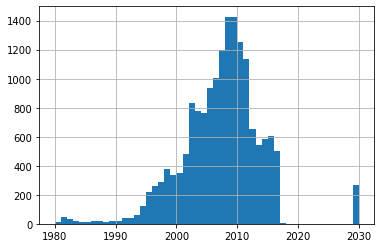

In [51]:
import matplotlib.pyplot as plt
total['year_of_release'].hist(bins = 50)

Как мы видим, наибольшее количество игр было выпущено в 2007-2011 гг. Затем наблюдается значительный спад, который по масштабам сравним с периодом начала выпуска компьютерных игр.

#### 2. Построим распределение по годам релиза для игр с отзывом и без отзыва, cравним полученные распределения и сделаем вывод

Для анализа создадим 2 таблицы - одну с отзывами, другую - без отзывов

In [61]:
score_nan = total.query('critic_score =="NaN" and user_score =="NaN"')
score_nan.head()

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption,total_players
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,NaN,24.67


In [62]:
score_yes = total.query('critic_score !="NaN" and user_score !="NaN"')
score_yes.head()

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption,total_players
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Для всех,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Для всех,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Для всех,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Для всех,28.91


Построим распределение для таблицы с пропусками в отзывах

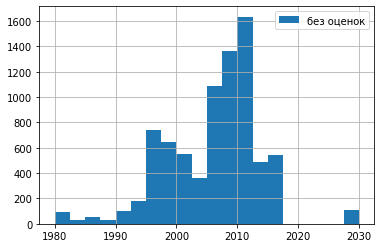

In [63]:
score_nan['year_of_release'].hist(bins = 20,label = 'без оценок')
plt.legend()
plt.show()

Построим распределение для таблицы с отзывами

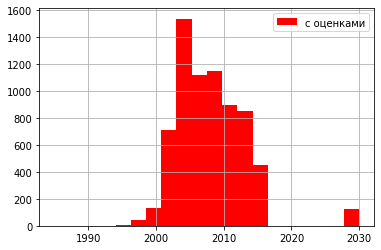

In [64]:
score_yes['year_of_release'].hist(bins = 20, label = 'с оценками', color = 'red')
plt.legend()
plt.show()

Как мы видим, большее количество игр с отзывами приходится на первую половину 2000-х годов, это можно объяснить тем, что было большее количество времени попользоваться игрой и оставить отзыв, а также тем, что это было достаточно ново для пользователей и вызывало неподдельный интерес. В свою очередь,  большее количество игр без оценок приходится на период 2010-2019 гг. 

####  3. Построим график продаж по каждому году и сделаем вывод

In [67]:
#создадим сводную таблицу по продажам
sales = total.pivot_table(index='year_of_release', values='total_players',aggfunc=sum)
sales.head()

,total_players
year_of_release,
1980,11.38
1981,35.68
1982,28.88
1983,16.80
1984,50.35


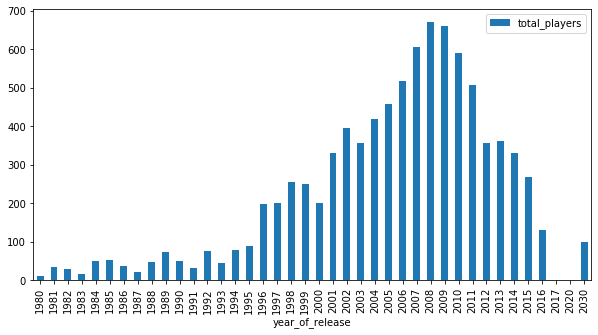

In [71]:
#построим график продаж 
sales.sort_values('year_of_release').plot(y='total_players', kind= 'bar', figsize=(10,5))

Пиковые продажи игр приходятся на 2007-2010 гг, до 2007 года продажи плавно росли год от года, с 2008 года тренд продаж начал падать, особенно резкий спад наблюдается с 2012 года.

#### 4. Построим ящик с усами по глобальным продажам, опишем полученный результат

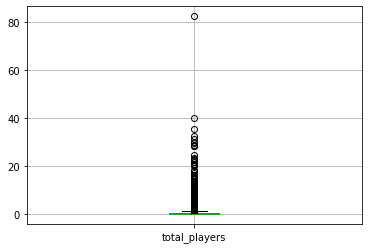

In [72]:
total.boxplot(['total_players'])

Ящик с усами показывает нам, что имеются выбросы в таблице. Это игра, которая получила доход в размере более 80 млн.долл. Давайте узнаем, что это за игра

In [75]:
total.query('total_players > 50')

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption,total_players
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Для всех,82.54


#### 5. Узнаем, на какой платформе было выпущено больше всего игр

In [84]:
total['platform'].value_counts().head(10)

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: platform, dtype: int64

Как мы видим, наиболее популярные платформы - это PS2, DS и PS3. 

#### 6. Определим, игр какого жанра больше всего 

In [85]:
total['genre'].value_counts().head(10)

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Name: genre, dtype: int64

Как мы видим, в первую тройку популярных жанров входят следующие жанры: Action, Sports, Misc. Важно обратить внимание, что жанр Action лидирует со значительным отрывом.

#### 7. Найдем игры с наибольшей и наименьшей оценкой от пользователей

In [95]:
print('Наибольшая оценка пользователей:', total['user_score'].max())

Наибольшая оценка пользователей: 9.7


In [96]:
print('Наименьшая оценка пользователей:', total['user_score'].min())

Наименьшая оценка пользователей: 0.0


Узнаем, что это за игры

In [91]:
min_user_score = total.query('user_score == 0.0')
min_user_score

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption,total_players
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0.0,E,Для всех,0.72


Как мы видим, данная игра продавалась в странах Северной Америки, но продажи были незначительными

In [93]:
max_user_score = total.query('user_score == 9.7')
max_user_score

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption,total_players
14414,Breath of Fire III,PSP,2005,Role-Playing,0.0,0.02,0.0,0.01,NaN,9.7,T,Подросткам 13—19 лет,0.03


#### 8. Найдем игры с наибольшей и наименьшей оценкой от критиков 

In [97]:
print('Наибольшая оценка критиков:', total['critic_score'].max())

Наибольшая оценка критиков: 98.0


In [98]:
print('Наименьшая оценка критиков:', total['critic_score'].min())

Наименьшая оценка критиков: 13.0


Узнаем, что это за игры

In [99]:
min_critic_score = total.query('critic_score == 13.0')
min_critic_score

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption,total_players
13690,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.0,0.01,13.0,1.0,M,От 17 лет,0.04


In [100]:
max_critic_score = total.query('critic_score == 98.0')
max_critic_score

,name,platform,year_of_release,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,decryption,total_players
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,От 17 лет,11.00
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,От 17 лет,10.50
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T,Подросткам 13—19 лет,4.68
5350,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T,Подросткам 13—19 лет,0.34


#### 9. Оценим корреляцию между оценками критиков и пользовательскими оценками

In [101]:
total['user_score'].corr(total['critic_score'])

0.5808778320767237

Как мы видим, наблюдается средняя зависимость оценок друг от друга. Это можно объяснить тем, что геймеры следят за отзывами и рейтингами и в целом отзывы похожи.

## Портрет пользователя для каждого региона 

Для пользователей каждого региона определим:

- топ-5 предпочтительных жанров

- в какие года пользователи были наиболее активны (больше всего покупали игры)

- топ-5 предпочтительных платформ

- какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

### Портрет пользователя Северной Америки 

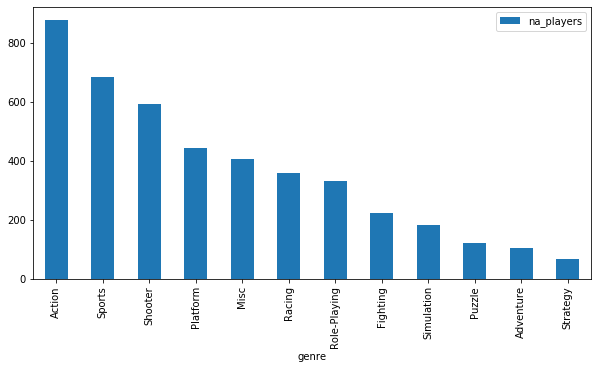

In [107]:
#топ-5 предпочтительных жанров
na_genre = total.groupby('genre')[['na_players']].sum().sort_values(by = 'na_players', ascending=False)
na_genre.plot(y='na_players',kind= 'bar',figsize=(10,5))

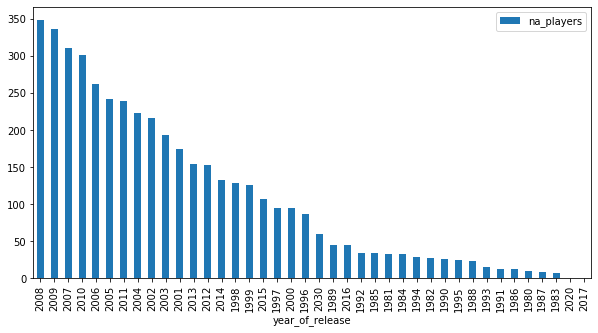

In [109]:
# в какие года пользователи были наиболее активны (больше всего покупали игры)
na_year = total.groupby('year_of_release')[['na_players']].sum().sort_values(by = 'na_players', ascending=False)
na_year.plot(y='na_players',kind= 'bar',figsize=(10,5))

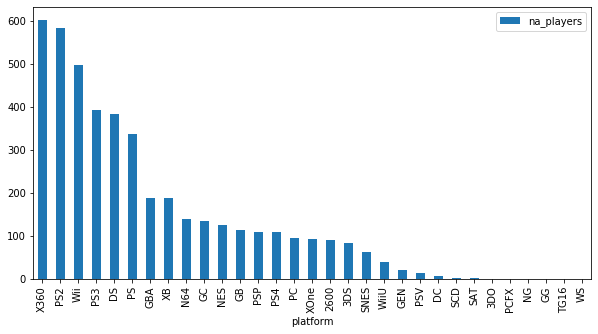

In [110]:
# топ-5 предпочтительных платформ
na_platform = total.groupby('platform')[['na_players']].sum().sort_values(by = 'na_players', ascending=False)
na_platform.plot(y='na_players',kind= 'bar',figsize=(10,5))

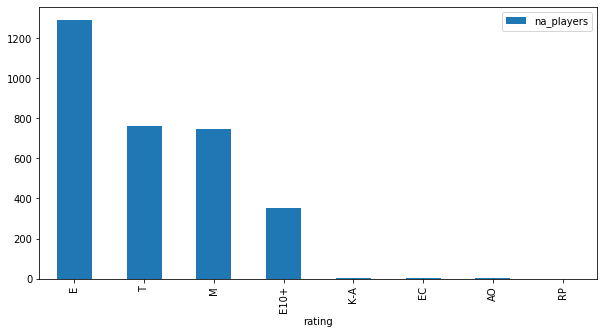

In [111]:
# какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)
na_rating = total.groupby('rating')[['na_players']].sum().sort_values(by = 'na_players', ascending=False)
na_rating.plot(y='na_players',kind= 'bar',figsize=(10,5))

**Для пользователя Северной Америки характерно следующее**:
- наиболее популярные жанры - Action, Sports
- в 2008-2009 гг совершалось наибольшее количество покупок компьютерных игр
- самые популярные платформы - X360 и PS2
- самый распространенный рейтинг игр - E (для всех)

### Портрет пользователя Европы

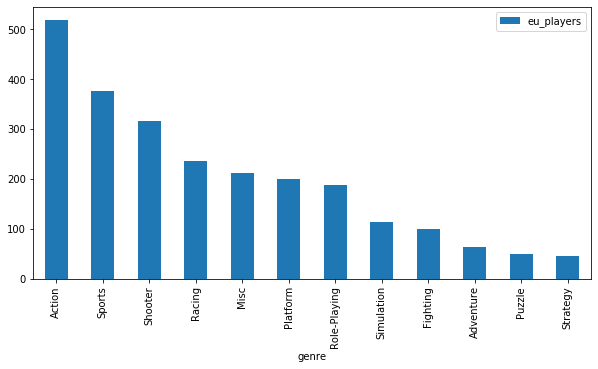

In [112]:
#топ-5 предпочтительных жанров
eu_genre = total.groupby('genre')[['eu_players']].sum().sort_values(by = 'eu_players', ascending=False)
eu_genre.plot(y='eu_players',kind= 'bar',figsize=(10,5))

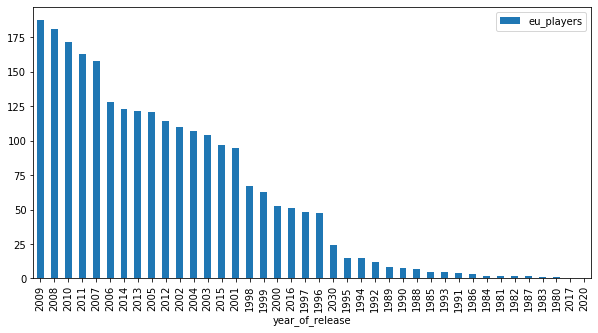

In [113]:
# в какие года пользователи были наиболее активны (больше всего покупали игры)
eu_year = total.groupby('year_of_release')[['eu_players']].sum().sort_values(by = 'eu_players', ascending=False)
eu_year.plot(y='eu_players',kind= 'bar',figsize=(10,5))

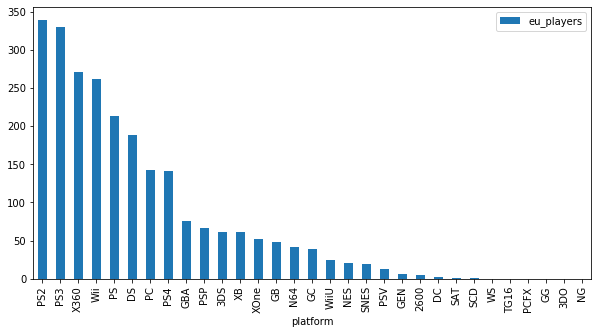

In [114]:
# топ-5 предпочтительных платформ
eu_platform = total.groupby('platform')[['eu_players']].sum().sort_values(by = 'eu_players', ascending=False)
eu_platform.plot(y='eu_players',kind= 'bar',figsize=(10,5))

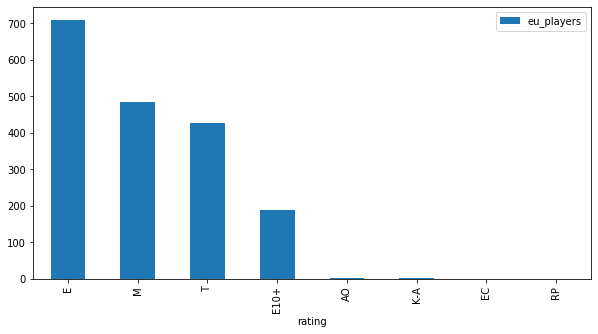

In [115]:
# какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)
eu_rating = total.groupby('rating')[['eu_players']].sum().sort_values(by = 'eu_players', ascending=False)
eu_rating.plot(y='eu_players',kind= 'bar',figsize=(10,5))

**Для пользователя Европы характерно следующее**:
- наиболее популярные жанры - Action, Sports
- в 2008-2009 гг совершалось наибольшее количество покупок компьютерных игр
- самые популярные платформы - PS2 и PS3
- самый распространенный рейтинг игр - E (для всех)

### Портрет пользователя России

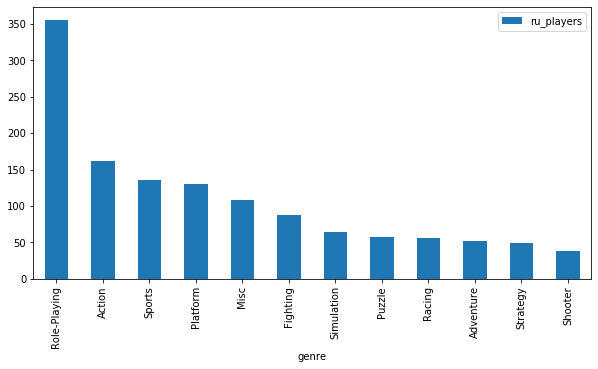

In [116]:
#топ-5 предпочтительных жанров
ru_genre = total.groupby('genre')[['ru_players']].sum().sort_values(by = 'ru_players', ascending=False)
ru_genre.plot(y='ru_players',kind= 'bar',figsize=(10,5))

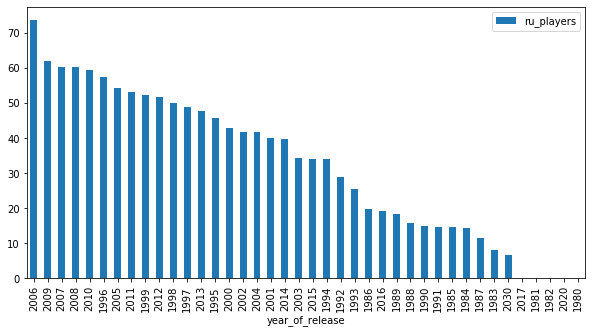

In [117]:
# в какие года пользователи были наиболее активны (больше всего покупали игры)
ru_year = total.groupby('year_of_release')[['ru_players']].sum().sort_values(by = 'ru_players', ascending=False)
ru_year.plot(y='ru_players',kind= 'bar',figsize=(10,5))

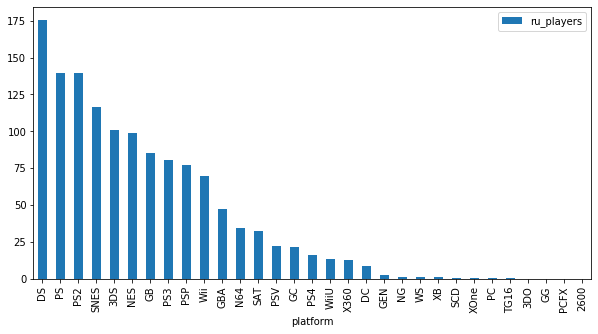

In [118]:
# топ-5 предпочтительных платформ
ru_platform = total.groupby('platform')[['ru_players']].sum().sort_values(by = 'ru_players', ascending=False)
ru_platform.plot(y='ru_players',kind= 'bar',figsize=(10,5))

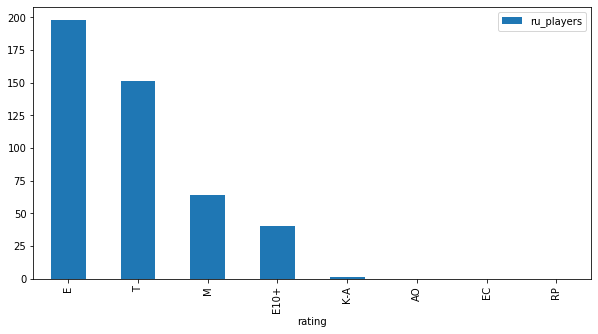

In [119]:
# какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)
ru_rating = total.groupby('rating')[['ru_players']].sum().sort_values(by = 'ru_players', ascending=False)
ru_rating.plot(y='ru_players',kind= 'bar',figsize=(10,5))

**Для пользователя России характерно следующее**:
- наиболее популярные жанры - Role-Playing, Action, 
- в 2006 г совершалось наибольшее количество покупок компьютерных игр
- самые популярные платформы - DS, PS 
- самый распространенный рейтинг игр - E (для всех)

**Как мы видим, в целом портреты пользователей Северной Америки и Европы совпадают. В свою очередь, портрет российского пользователя отличается тем, что наши геймеры предпочитают ролевые игры (значительный отрыв от других жанров) и на платформах DS и PS.**

## Проверка гипотез


1) Средний пользовательский рейтинг платформ PS2 и PS3 одинаковый.

2) Средний пользовательский рейтинг жанров Action и Sports не различается.

In [120]:
from scipy import stats as st
import numpy as np
ps2 = total.query('platform =="PS2"')
ps3 = total.query('platform =="PS3"')

In [121]:
#поскольку у нас много пропущенных значений, нужно их удалить прежде, чем мы начнем сравнивать гипотезы
ps2_score = ps2['user_score']
ps3_score = ps3['user_score']
ps2_score = ps2_score.dropna()
ps3_score = ps3_score.dropna()

#### Сформулируем гипотезы:  
H0: Cредний пользовательский рейтинг платформ PS2 и PS3 одинаковый  
H1: Cредний пользовательский рейтинг платформ PS2 и PS3 разный

In [122]:
alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(ps2_score,ps3_score)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.5742610791426753e-47
Отвергаем нулевую гипотезу


Проверим себя, посчитаем средний пользовательский рейтинг указанных платформ

In [124]:
print('Средний пользовательский рейтинг платформы PS2:', ps2['user_score'].mean())
print('Средний пользовательский рейтинг платформы PS3:', ps3['user_score'].mean())

Средний пользовательский рейтинг платформы PS2: 7.626833199033038
Средний пользовательский рейтинг платформы PS3: 6.726567844925884


**Вывод: Cредний пользовательский рейтинг платформ PS2 и PS3 разный**

Проверим теперь вторую гипотезу

In [125]:
action = total.query('genre =="Action"')
sports = total.query('genre =="Sports"')

In [126]:
#поскольку у нас много пропущенных значений, нужно их удалить прежде, чем мы начнем сравнивать гипотезы
action_score = action['user_score']
sports_score = sports['user_score']
action_score = action_score.dropna()
sports_score = sports_score.dropna()

#### Сформулируем гипотезы:  
H0: Средний пользовательский рейтинг жанров Action и Sports не различается  
H1: Средний пользовательский рейтинг жанров Action и Sports различается

In [128]:
alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(action_score,sports_score)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


In [129]:
#проверим себя
print('Средний пользовательский рейтинг жанра Action:', action['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports:', sports['user_score'].mean())

Средний пользовательский рейтинг жанра Action: 7.054043715846995
Средний пользовательский рейтинг жанра Sports: 6.96119673617407


**Вывод: средний пользовательский рейтинг жанров Action и Sports не различается**

## Общий вывод

Посчитаем, сколько денег тратят пользователи из разных регионов:

In [131]:
print('Пользователи из Северной Америки потратили: ', total['na_players'].sum(), 'млн $')
print('Пользователи из Европы потратили: ', total['eu_players'].sum(), 'млн $')
print('Пользователи из России потратили: ', total['ru_players'].sum(), 'млн $')

Пользователи из Северной Америки потратили:  4400.84 млн $
Пользователи из Европы потратили:  2424.1400000000003 млн $
Пользователи из России потратили:  1297.4 млн $


1. Как мы видим, наибольшее количество продаж совершается в странах Северной Америки, со значительным отрывом следуют страны Европы и Россия. Северная Америка - регион, который является наиболее интересным для разработчиков компьютерных игр.
2. Самый популярный жанр в рассматриваемых регионах - Action.
3. Наиболее популярная платформа - PS2.
4. Наибольшее количество продаж пришлось на период 2008-2009 гг.
5. Портрет российского пользователя отличается от пользователей в других регионах по жанру - на первом месте находятся ролевые игры.